In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from alt.client import interface

from protobuf_to_dict import dict_to_protobuf
from alt.proto.python_build import study_pb2, experiment_pb2

ModuleNotFoundError: No module named 'alt'

### Protobuf of StudySetting

message StudySetting {

    string studyName = 1;
    string studyAuthor = 2;

    int32 maxParallelExperiments = 3;
    int32 maxTrials = 4;

    bool ifMax = 5;
    StudyGoal goal = 6;
    MetricSetting metricSetting = 7;

    bool stopped = 8;               // default is False
    google.protobuf.Timestamp timeCreated = 9;
    google.protobuf.Timestamp timeStopped = 10;
    StatusResponse statusResponse = 11;
}

In [11]:
import alt

ModuleNotFoundError: No module named 'alt'

### Hparam Protobuf

message HparamSetting {

    string name = 1;
    HparamType type = 2;
    ValueRange valrange = 3;        // Optional inclusive range for continuous varaibles.
    ValueSet valset = 4;            // Optional set of feasible values for discrete varaibles.
    WarpingType warping = 5;
}

In [20]:
hparam_x = dict(name='x',
                type='FLOAT',
                valrange=dict(lower=5., upper=10.),
                warping='LINEAR'
                )
hparam_y = dict(name='y',
                type='FLOAT',
                valrange=dict(lower=1., upper=2.),
                warping='LINEAR'
                )
studySetting_dict = {
    'studyName': 'devtest_hparam_1',
    'studyAuthor': 'dev',

    'maxParallelExperiments': 1,
    'maxTrials': 50,

    'goal': 'MAXIMIZE',
    'hparamSetting': [hparam_x, hparam_y],
}
interface.createStudyFromDict(studySetting_dict)

'5c0755eff0d46e511bff1b6d'

In [ ]:
import yaml
with open('./config.yaml','w') as fn_out:
    yaml.dump(studySetting_dict, fn_out)

In [21]:
studyID = '5c0755eff0d46e511bff1b6d'
interface.infoStudy(studyID)

studyName: "devtest_hparam_1"
studyAuthor: "dev"
maxParallelExperiments: 1
maxTrials: 50
goal: MAXIMIZE
hparamSetting {
  name: "x"
  type: FLOAT
  valrange {
    lower: 5.0
    upper: 10.0
  }
  warping: LINEAR
}
hparamSetting {
  name: "y"
  type: FLOAT
  valrange {
    lower: 1.0
    upper: 2.0
  }
  warping: LINEAR
}
timeCreated {
  seconds: 1543984623
  nanos: 421000000
}
statusResponse {
  status: SUCCESS
}
studyID: "5c0755eff0d46e511bff1b6d"

# Experiment Section

In [12]:
study_id = "5c0755eff0d46e511bff1b6d"

exp_id = interface.createExperiment(study_id)
interface.infoExperiment(study_id, exp_id)

studyID: "5c0755eff0d46e511bff1b6d"
experimentID: "5c0763e3f0d46e0a1d0872a7"
hparamValue {
  name: "x"
  value: 5.867222785949707
  type: FLOAT
}
hparamValue {
  name: "y"
  value: 1.964369297027588
  type: FLOAT
}
timeCreated {
  seconds: 1543988195
  nanos: 91000000
}
statusResponse {
  status: SUCCESS
}

# Metric Section

In [30]:
exp_id

'5c0763e3f0d46e0a1d0872a7'

In [33]:
interface.updateMetric(study_id, exp_id, 0.1)

FailedRPC: Status Code: 3
Message: The experiment has already finished. Metrics can't be changed or updated any more.

In [32]:
interface.finishExperimentWithMetric(study_id, exp_id, 0.1)

FailedRPC: Status Code: 3
Message: The experiment has already finished. Metrics can't be changed or updated any more.

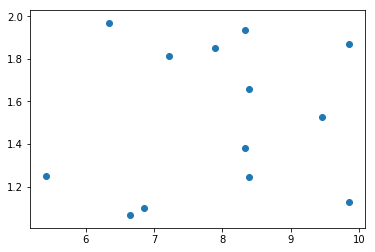

In [48]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

X = np.array([[ 8.39613605,  1.24384484],
 [ 6.64414165,  1.06656353],
 [ 6.34502968,  1.96806401],
 [ 9.46119586,  1.52554383],
 [ 8.390747  ,  1.66036309],
 [ 8.33816283,  1.9377651 ],
 [ 7.89788075,  1.85030528],
 [ 5.42188275,  1.24925864],
 [ 8.32980503,  1.38048065],
 [ 6.85922054,  1.10078265],
 [ 9.85431239,  1.12729783],
 [ 7.22254436,  1.81613828],
 [ 9.85442275,  1.87248724]])

plt.scatter(X[:, 0], X[:, 1])

# Test GPyOpt

In [28]:
import GPyOpt

In [29]:
objective_true  = GPyOpt.objective_examples.experiments2d.branin()                 # true function
objective_noisy = GPyOpt.objective_examples.experiments2d.branin(sd = 0.1)         # noisy version
bounds = objective_noisy.bounds

In [ ]:
domain = [{'name': 'var_1', 'type': 'continuous', 'domain': bounds[0]}, ## use default bounds
          {'name': 'var_2', 'type': 'continuous', 'domain': bounds[1]}]

demo_parallel = GPyOpt.methods.BayesianOptimization(
    f=lambda x:None,
    domain = domain,                  
    acquisition_type = 'LCB',              
    normalize_Y = True,
    initial_design_numdata = 10,
    evaluator_type = 'local_penalization',
    batch_size = 1,
    num_cores = 4,
    acquisition_jitter = 0)

In [ ]:
demo_parallel.suggest_next_locations(pending_X=None,
                                     ignored_X=None)

In [ ]:
demo_parallel.suggest_next_locations(pending_X=None,
                                     ignored_X=None)

In [ ]:
len(demo_parallel.Y)